In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline

In [3]:
iris = pd.read_csv('D:\Great Learning\R3 Lab\iris.data',sep=',')

In [4]:
iris.columns = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class']

In [5]:
iris.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
15,5.4,3.9,1.3,0.4,Iris-setosa
60,5.9,3.0,4.2,1.5,Iris-versicolor
116,7.7,3.8,6.7,2.2,Iris-virginica
18,5.1,3.8,1.5,0.3,Iris-setosa
42,5.0,3.5,1.6,0.6,Iris-setosa
50,6.4,3.2,4.5,1.5,Iris-versicolor
85,6.7,3.1,4.7,1.5,Iris-versicolor
76,6.7,3.0,5.0,1.7,Iris-versicolor
100,5.8,2.7,5.1,1.9,Iris-virginica
67,6.2,2.2,4.5,1.5,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
iris.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [7]:
## There are no missing values in the data set

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [8]:
iris['class_cat']=pd.Categorical(iris['class'])

In [9]:
iris.dtypes

sepal length in cm     float64
sepal width in cm      float64
petal length in cm     float64
petal width in cm      float64
class                   object
class_cat             category
dtype: object

In [10]:
iris['class_cat']=iris['class_cat'].cat.codes

In [11]:
iris.head(5)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class,class_cat
0,4.9,3.0,1.4,0.2,Iris-setosa,0
1,4.7,3.2,1.3,0.2,Iris-setosa,0
2,4.6,3.1,1.5,0.2,Iris-setosa,0
3,5.0,3.6,1.4,0.2,Iris-setosa,0
4,5.4,3.9,1.7,0.4,Iris-setosa,0


In [12]:
iris_cat = iris.copy()

In [13]:
iris_cat.drop(labels='class',axis=1,inplace = True)

In [14]:
iris_cat.sample(10)

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class_cat
99,6.3,3.3,6.0,2.5,2
148,5.9,3.0,5.1,1.8,2
128,7.2,3.0,5.8,1.6,2
127,6.4,2.8,5.6,2.1,2
107,6.7,2.5,5.8,1.8,2
30,5.4,3.4,1.5,0.4,0
137,6.0,3.0,4.8,1.8,2
10,4.8,3.4,1.6,0.2,0
132,6.3,2.8,5.1,1.5,2
81,5.8,2.7,3.9,1.2,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [15]:
iris_cat.corr()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class_cat
sepal length in cm,1.000000,-0.103784,0.871283,0.816971,0.781219
sepal width in cm,-0.103784,1.000000,-0.415218,-0.350733,-0.414532
petal length in cm,0.871283,-0.415218,1.000000,0.962314,0.948519
petal width in cm,0.816971,-0.350733,0.962314,1.000000,0.956014
class_cat,0.781219,-0.414532,0.948519,0.956014,1.000000


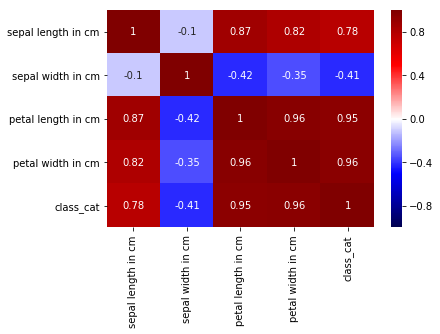

In [16]:
sns.heatmap(iris_cat.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [17]:
## none of the features has correlatoin in the range of -0.1 to 0.1. hence all features included

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [18]:
iris_cat.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length in cm,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
sepal width in cm,149.0,3.051007,0.433499,2.0,2.8,3.0,3.3,4.4
petal length in cm,149.0,3.774497,1.759651,1.0,1.6,4.4,5.1,6.9
petal width in cm,149.0,1.205369,0.761292,0.1,0.3,1.3,1.8,2.5
class_cat,149.0,1.006711,0.817847,0.0,0.0,1.0,2.0,2.0


In [19]:
iris_cat.var()

sepal length in cm    0.686568
sepal width in cm     0.187921
petal length in cm    3.096372
petal width in cm     0.579566
class_cat             0.668874
dtype: float64

In [20]:
# variance of all features is > 0.1 hence all features included

## Question 6

*Plot the scatter matrix for all the variables.*

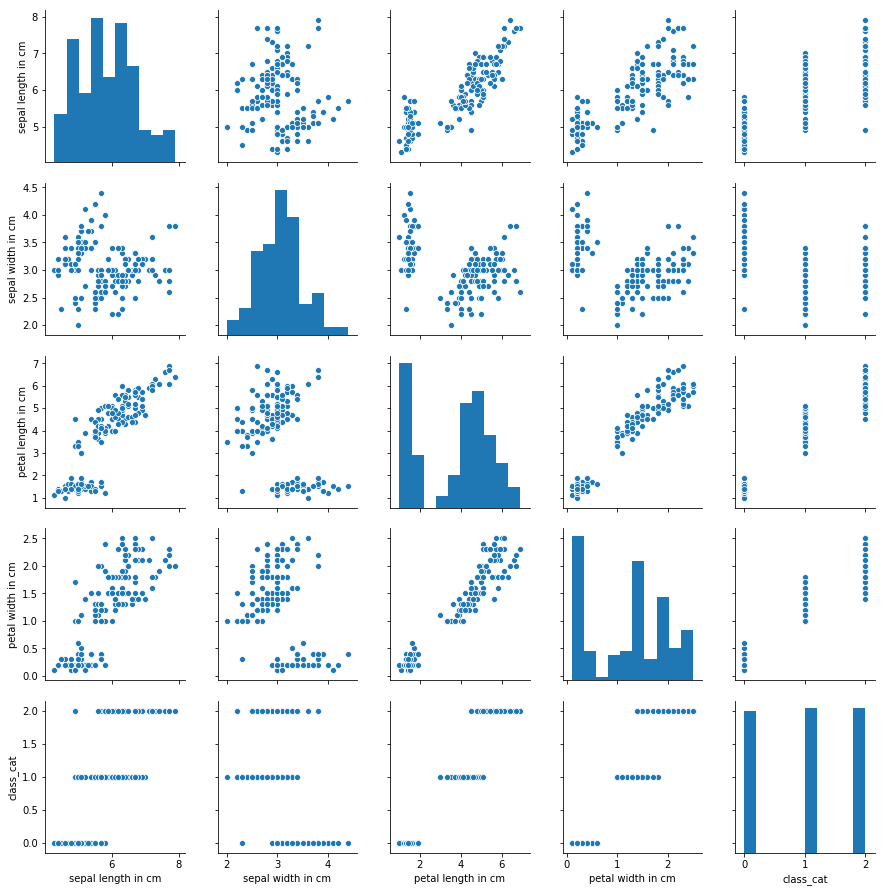

In [21]:
sns.pairplot(iris_cat)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [22]:
x = iris_cat.drop(labels = 'class_cat',axis=1)
y = iris_cat['class_cat']
from sklearn import metrics
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=50)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [23]:
NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', metric = 'euclidean')
NNH3.fit(x_train, y_train)
NNH3.score(x_train,y_train)

0.9495798319327731

In [24]:
y_predict3 = NNH3.predict(x_test)
accuracy_score(y_predict3,y_test)

1.0

In [25]:
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', metric = 'euclidean')
NNH5.fit(x_train, y_train)
NNH5.score(x_train,y_train)

0.957983193277311

In [26]:
y_predict5 = NNH5.predict(x_test)
accuracy_score(y_predict5,y_test)

1.0

In [27]:
NNH7 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', metric = 'euclidean')
NNH7.fit(x_train, y_train)
NNH7.score(x_train,y_train)

0.9663865546218487

In [28]:
y_predict7 = NNH7.predict(x_test)
accuracy_score(y_predict7,y_test)

0.9666666666666667

In [29]:
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', metric = 'euclidean')
NNH9.fit(x_train, y_train)
NNH9.score(x_train,y_train)

0.9747899159663865

In [30]:
y_predict9 = NNH9.predict(x_test)

In [31]:
accuracy_score(y_predict9,y_test)

0.9333333333333333

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [123]:
k = 1
table = []
table = pd.DataFrame(columns = ['k','mse'])
lst_dict=[]
table.head(5)

,k,mse


In [124]:

for k in range (1,20):
    if(k%2!=0):
        NNH = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', metric = 'euclidean')
        NNH.fit(x_train, y_train)
        y_predict = NNH.predict(x_test)
        
        mse = 1 - accuracy_score(y_predict,y_test)
        lst_dict.append({'k':k,'mse':mse})
        tab = table.append(lst_dict,ignore_index=True)
        
        print('k is',k,'mse is ',mse)

k is 1 mse is  0.0
k is 3 mse is  0.0
k is 5 mse is  0.0
k is 7 mse is  0.033333333333333326
k is 9 mse is  0.06666666666666665
k is 11 mse is  0.033333333333333326
k is 13 mse is  0.033333333333333326
k is 15 mse is  0.033333333333333326
k is 17 mse is  0.033333333333333326
k is 19 mse is  0.06666666666666665


In [125]:
lst_dict

[{'k': 1, 'mse': 0.0},
 {'k': 3, 'mse': 0.0},
 {'k': 5, 'mse': 0.0},
 {'k': 7, 'mse': 0.033333333333333326},
 {'k': 9, 'mse': 0.06666666666666665},
 {'k': 11, 'mse': 0.033333333333333326},
 {'k': 13, 'mse': 0.033333333333333326},
 {'k': 15, 'mse': 0.033333333333333326},
 {'k': 17, 'mse': 0.033333333333333326},
 {'k': 19, 'mse': 0.06666666666666665}]

In [127]:
tab

,k,mse
0,1,0.000000
1,3,0.000000
2,5,0.000000
3,7,0.033333
4,9,0.066667
5,11,0.033333
6,13,0.033333
7,15,0.033333
8,17,0.033333
9,19,0.066667


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [129]:
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

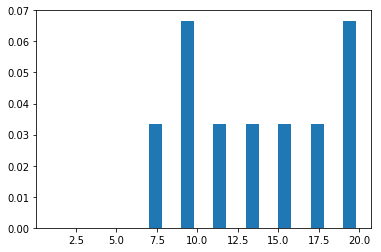

In [137]:
plt.bar(tab['k'],tab['mse'],align='edge')

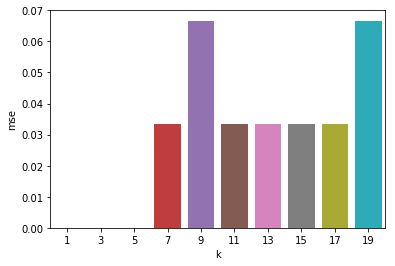

In [141]:
sns.barplot(x=tab['k'],y=tab['mse'])

# Naive Bayes with Iris Data

In [142]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [209]:
iris_nb = iris.copy()

In [210]:
iris_nb['Species'] = iris_nb['class']

In [211]:
iris_nb.drop(columns='class',inplace=True,axis=1)
iris_nb.drop(columns='class_cat',inplace=True,axis=1)

In [213]:
X = iris_nb.drop(columns = 'Species',axis=1)
y = iris_nb['Species']

In [214]:
#Check the dataset
print(y)
print(X)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
5         Iris-setosa
6         Iris-setosa
7         Iris-setosa
8         Iris-setosa
9         Iris-setosa
10        Iris-setosa
11        Iris-setosa
12        Iris-setosa
13        Iris-setosa
14        Iris-setosa
15        Iris-setosa
16        Iris-setosa
17        Iris-setosa
18        Iris-setosa
19        Iris-setosa
20        Iris-setosa
21        Iris-setosa
22        Iris-setosa
23        Iris-setosa
24        Iris-setosa
25        Iris-setosa
26        Iris-setosa
27        Iris-setosa
28        Iris-setosa
29        Iris-setosa
            ...      
119    Iris-virginica
120    Iris-virginica
121    Iris-virginica
122    Iris-virginica
123    Iris-virginica
124    Iris-virginica
125    Iris-virginica
126    Iris-virginica
127    Iris-virginica
128    Iris-virginica
129    Iris-virginica
130    Iris-virginica
131    Iris-virginica
132    Iris-virginica
133    Iri

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

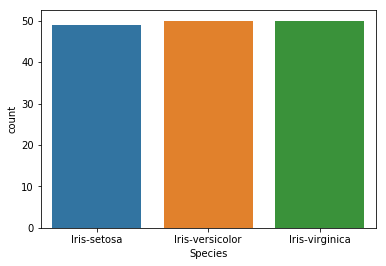

In [215]:
sns.countplot(y)

In [216]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [217]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [ ]:
# petal length and petal width are highly correlated hence petal width can be dropped
# sepal length and petal lenght are highly correlated hence petal length can be dropped

In [218]:
X.drop(['petal width in cm'],axis=1,inplace=True)
X.drop(['petal length in cm'],axis=1,inplace=True)

In [220]:
X.corr()

,sepal length in cm,sepal width in cm
sepal length in cm,1.000000,-0.103784
sepal width in cm,-0.103784,1.000000


### Split data in Training and test set in 80:20.

In [221]:
from sklearn.model_selection import train_test_split
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

### Question 13 
Do Feature Scaling 

In [222]:
# Use StandardScaler or similar methods

In [223]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xnb_train = sc.fit_transform(Xnb_train)
Xnb_test = sc.transform(Xnb_test)

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model

In [224]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(Xnb_train, ynb_train)

GaussianNB(priors=None)

In [0]:
#Predict

In [226]:
ynb_pred = nvclassifier.predict(Xnb_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [0]:
# show Confusion Matrix

In [227]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ynb_test, ynb_pred)

In [228]:
cm

array([[10,  1,  0],
       [ 0,  7,  4],
       [ 0,  3,  5]], dtype=int64)

In [0]:
# show accuracy

In [229]:
p = cm.shape
true_pred = 0
false_pred = 0

for row in range(p[0]):
    for c in range(p[1]):
        if row == c:
            true_pred +=cm[row,c]
        else:
            false_pred += cm[row,c]
print('Correct predictions: ', true_pred)
print('False predictions', false_pred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', true_pred/(cm.sum()))


Correct predictions:  22
False predictions 8


Accuracy of the Naive Bayes Clasification is:  0.7333333333333333


In [230]:
accuracy_score(ynb_test,ynb_pred)

0.7333333333333333

In [0]:
#Show precision and Recall metrics

In [235]:
from sklearn.metrics import precision_score
precision_score(ynb_test,ynb_pred,average='macro')

0.7306397306397306

In [236]:
from sklearn.metrics import recall_score
recall_score(ynb_test,ynb_pred,average='macro')

0.7234848484848485

# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [0]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [0]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [0]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [0]:
# use from sklearn.svm import SVC

In [0]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [0]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [0]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [0]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [0]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [0]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [0]:
gs.best_score_ 

0.77777777777777779